## 1. Importing libraries

In [95]:
# Importing warning
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Dataset

In [97]:
# Importing Training Dataset
train = pd.read_csv('train.csv')

# Verify
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
# Importing Test Dataset
test = pd.read_csv('test.csv')

# Verify
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Data Understanding

The Titanic dataset from ([Kaggle](https://www.kaggle.com/c/titanic/data)) includes two separate files: `train` and `test`. The `train` file is used for building the model and evaluating it, while the `test` file is to predict and submit the results to Kaggle - Titanic - Machine Learning from Disaster Competition.


#### Column Definitions

1. **Passenger ID** - Unique identifier for each passenger, starting from **1**.
2. **Survived** - Indicates whether the passenger survived (1: Survived | 0: Not Survived).
3. **Pclass** - Ticket class of the passenger (1: First class | 2: Second class | 3: Third class).
4. **Name** - Full name of the passenger, formatted as "Lastname, Title. Firstname". For married women, it is formatted as "Lastname of spouse, Title-Mrs. Firstname of spouse (Firstname Middlename Lastname)".
5. **Sex** - Gender of the passenger (male or female).
6. **Age** - Age of the passenger, ranging from 5 months (0.42) to 80 years.
7. **SibSp** - Number of siblings/spouses aboard the Titanic.
8. **Parch** - Number of parents/children aboard the Titanic.
9. **Ticket** - Ticket number, which may include both a prefix and a number.
10. **Fare** - Fare paid by the passenger, ranging from 0.0 to 512.33.
11. **Embarked** - Port where the passenger boarded the Titanic (C: Cherbourg | Q: Queenstown | S: Southampton).

## 4. Handling missing values

In [99]:
# Viewing the dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
# Viewing the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
# Missing values percent
print('% of missing values \n')
print(round(((train.isnull().sum()*100)/train.shape[0])[train.isnull().sum()>0] , 2).sort_values(ascending = False))


% of missing values 

Cabin       77.10
Age         19.87
Embarked     0.22
dtype: float64


The "Cabin" column has 77% missing values, which is a substantial proportion and should be dropped to avoid potential misinterpretations.

#### 4.1 Handling missing values - Dropping

In [102]:
# Dropping 'Cabin' column
train.drop('Cabin' , inplace = True, axis = 1)

# Verify
train.isnull().sum()[train.isnull().sum()>0]

Age         177
Embarked      2
dtype: int64

#### 4.2 Handling missing values - Imputing

In [103]:
# Missing values percent
print('% of missing values \n')
print(round(((train.isnull().sum()*100)/train.shape[0])[train.isnull().sum()>0] , 2).sort_values(ascending = False))

% of missing values 

Age         19.87
Embarked     0.22
dtype: float64


In [104]:
# Viewing the rows with missing values - 1. Embarked
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [105]:
# Finding the most common value - 1.Embarked
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Since neither passenger has any siblings or parents onboard, we can't figure out where they embarked from. So, let's just fill in the most common embarked value = 'S'.

In [106]:
# Imputing with most common value
train.Embarked[train.Embarked.isnull()] = 'S'

# Verify
print('Columns with missing values \n')
print(train.isnull().sum()[train.isnull().sum()>0])

Columns with missing values 

Age    177
dtype: int64


In [107]:
# % of missing values
print('% of Missing values in Age : ',round((train.isnull().sum()['Age']*100) / train.shape[0] , 2),'%')

% of Missing values in Age :  19.87 %


Imputing the missing values in Age is critical because they constitute approximately 20% of the dataset. Misinterpreting these missing values could significantly impact the accuracy and integrity of the results.

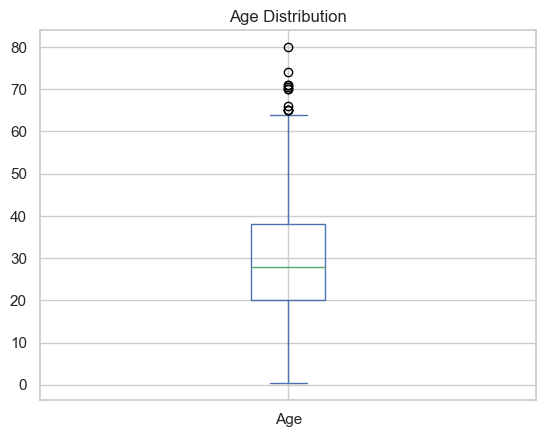

In [108]:
# Viewing the feature using boxplot - 2. Age
plt.title('Age Distribution')
train.Age.plot.box()
plt.show()

Based on the box plot, we see that ages span from 0 to 80 years, with a notable concentration of individuals aged between 20 and 40 years. The median age is around 28 years. However, it wouldn't be appropriate to impute missing ages uniformly, as they represent a significant portion of the dataset.

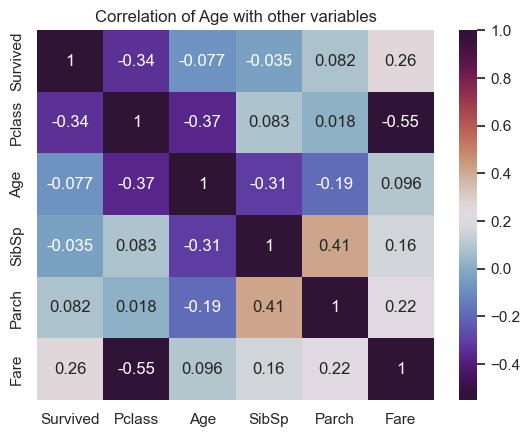

In [109]:
# Visualizing the correlation of Age feature with other variables
plt.title('Correlation of Age with other variables')
sns.heatmap(train[['Survived', 'Pclass','Age', 'SibSp','Parch', 'Fare']].corr() , annot = True , cmap = 'twilight_shifted' )
plt.show()

The heatmap suggests that Age lacks strong correlations with other features for imputation, whereas P_class shows a notable correlation of -0.41, which could be significant for decision-making regarding imputation strategies.

We can extract titles from the feature 'Name' and use their mean values within their 'Pclass' to impute age.

#### 4.2.1 Feature engineering

In [110]:
# Extracting the Title
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.' , expand = False)

# Verify
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [111]:
# Finding the number of missing values for each title
train[['Title','Age']][train['Age'].isnull()].Title.value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [112]:
# Finding the mean age of each category based on Pclass and Title
train.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])

count       mean
Title    Pclass                  
Capt     1           1  70.000000
Col      1           2  58.000000
Countess 1           1  33.000000
Don      1           1  40.000000
Dr       1           4  43.750000
         2           2  38.500000
Jonkheer 1           1  38.000000
Lady     1           1  48.000000
Major    1           2  48.500000
Master   1           3   5.306667
         2           9   2.258889
         3          24   5.350833
Miss     1          45  30.000000
         2          32  22.390625
         3          69  16.123188
Mlle     1           2  24.000000
Mme      1           1  24.000000
Mr       1          87  41.580460
         2          82  32.768293
         3         229  28.724891
Mrs      1          34  40.882353
         2          41  33.682927
         3          33  33.515152
Ms       2           1  28.000000
Rev      2           6  43.166667
Sir      1           1  49.000000

We've identified discrepancies in the dataset where titles appear in different languages, including Spanish, Dutch, French, and English. Our approach now is to standardize these titles.

In [113]:
# 1. Combining Miss, Ms, and Mlle into a single category: Miss.
train.Title[(train['Title'] == 'Mlle') | (train['Title'] == 'Ms')] = 'Miss'

# 2. Combining Mrs , Lady , Countess and Mme : Mrs
train.Title[(train['Title'] == 'Mme')| (train['Title'] == 'Lady') | (train['Title'] == 'Countess')] = 'Mrs'

# 3. Combining Mr and Don : Mr
train.Title[(train['Title'] == 'Don')] = 'Mr'

# Finding the number of missing values for each title
train[['Title','Age']][train['Age'].isnull()].Title.value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

Let's proceed with imputing values based on the mean values derived from the table above.

In [114]:
# Imputing Age Categories

# 1. Master
train[(train['Title'] == 'Master') & (train.Age.isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C,Master



All the children belong to Pclass = 3. Let's impute their ages with the mean age for Pclass 3, which is 5.

In [115]:
# Imputing the Age of Masters
train.Age[(train['Title'] == 'Master') & (train.Age.isna())] = 5

In [116]:
# Finding the number of missing values for each title
train[['Title','Age']][train['Age'].isnull()].Title.value_counts()

Title
Mr      119
Miss     36
Mrs      17
Dr        1
Name: count, dtype: int64

We have four more titles to handle. Let’s write a simple program to automate the imputation.

In [117]:
# Creating a simple function to impute age based on Pclass and Mean of age

def impute(train):
    # Creating a datframe from the groupby output
    age_pclass_summary = train.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])
    age_pclass_summary['mean'] = round(age_pclass_summary['mean'],2)

    # Assigning the titles to a list variable
    titles = ['Mr' , 'Miss' , 'Mrs' , 'Dr']

    # Program to impute missing Age values based on title and Pclass
    for x in titles:
        for index,rows in train[(train['Title'] == x) & (train['Age'].isna())].iterrows():
            pclass = train.iloc[index]['Pclass']
            train.at[index, 'Age'] = age_pclass_summary.loc[x,pclass][1]

    return train

train = impute(train)

# Verifying the missing values list
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

All the missing values has been handled. 

## 5. Exploratory Data Analysis

To explore the relationship among the features.

In [118]:
# Creating a new dataframe with variables for EDA
df_train = train[['Survived', 'Pclass',  'Sex', 'Age', 'SibSp','Parch',  'Fare', 'Embarked']]

We excluded 'PassengerId', 'Name','Title' and 'Ticket' from the Titanic dataset as they do not contribute to the dataset's analysis.

In [119]:
# Viewing the data
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 5.1 Bivariate Analysis

In [120]:
# 1. % of Survivors
print('Survival %')
print('Total :',round(df_train.Survived.sum() * 100/df_train.shape[0] , 2) , '%')
print('Female:',round( df_train[(df_train['Sex'] == 'female') & (df_train.Survived == 1)].shape[0]* 100/df_train.Survived.sum() , 2) , '%')
print('Male  :',round( df_train[(df_train['Sex'] == 'male') & (df_train.Survived == 1)].shape[0]* 100/df_train.Survived.sum() , 2) , '%')


Survival %
Total : 38.38 %
Female: 68.13 %
Male  : 31.87 %


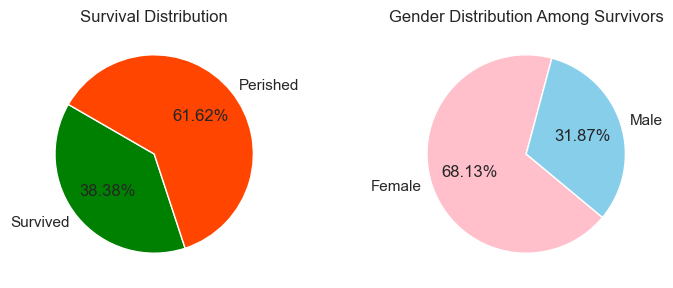

In [121]:
# Plotting the % of Survivors
fig, axes = plt.subplots(1,2,figsize = (8,4))

Survival = {'Survived': 38.38 , 'Perished' : 61.62}
labels= Survival.keys()
values = Survival.values()
axes[0].pie(values, labels = labels, autopct = '%.2f%%', startangle = 150 , colors = ['green' , 'orangered'])
axes[0].set_title('Survival Distribution')

plt.subplots_adjust(wspace=0.5)

Survival = {'Female': 68.13 , 'Male' : 31.87}
labels= Survival.keys()
values = Survival.values()
axes[1].pie(values, labels = labels, autopct = '%.2f%%', startangle = 75 , colors = ['pink' , 'skyblue'])
axes[1].set_title('Gender Distribution Among Survivors')
plt.show()

Among the total number of passengers, the survival rate is only 38%. Of those who survived, 68% are female and 31% are male, largely due to     the **"women and children first"** policy.

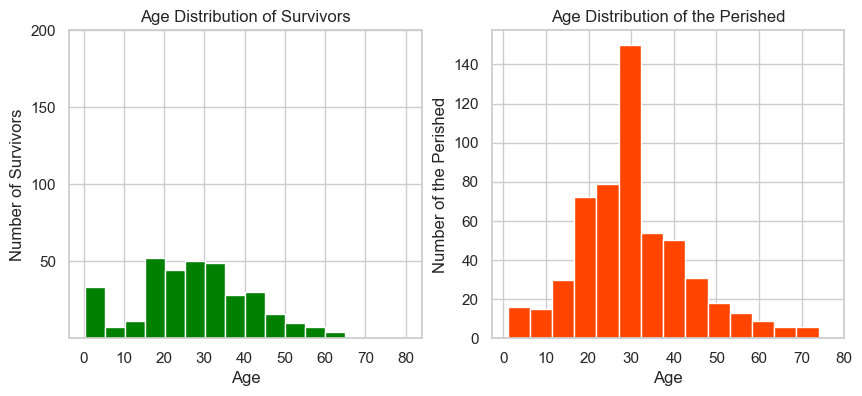

In [122]:
# 2. Plotting the Age distribution among Survivors and the Perished
fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing Age Distribution of Survivors
axes[0].hist(df_train.Age[df_train['Survived']==1] , edgecolor ='white' , bins = 16 , color = 'green')
axes[0].set_title('Age Distribution of Survivors')
axes[0].set_xlabel('Age')
axes[0].set_xticks([0,10,20,30,40,50,60,70,80])
axes[0].set_yticks([50,100,150,200])
axes[0].set_ylabel('Number of Survivors')

# Visualizing Age Distribution of the Perished
axes[1].hist(df_train.Age[df_train['Survived']==0] , edgecolor ='white' , bins = 14 , color = 'orangered')
axes[1].set_title('Age Distribution of the Perished')
axes[1].set_xlabel('Age')
axes[1].set_xticks([0,10,20,30,40,50,60,70, 80])
axes[1].set_ylabel('Number of the Perished')
plt.show()

The charts distinctly illustrates a lower count of survivors. The distribution of ages shows a skew towards younger survivors. Individuals around 30 years old had a higher chance of perishing, evident from the peak in the second histogram.

Factors contributing to this pattern may include the prioritization of women and children in lifeboats and the presence of stronger individuals within the 20-40 age group.

#### 5.2 Multivariate Analysis

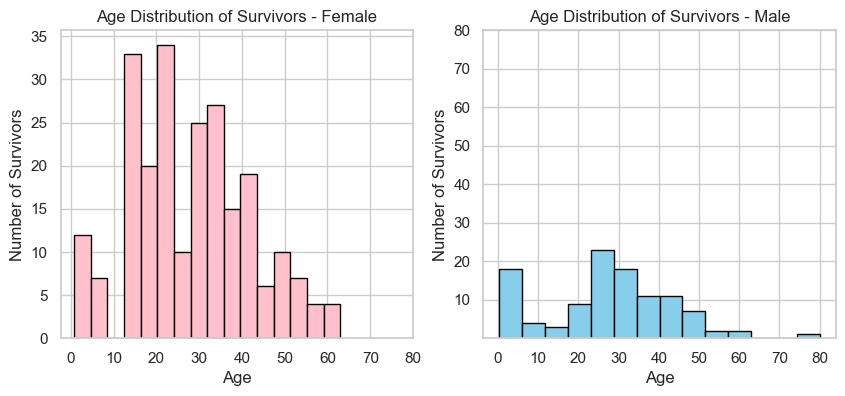

In [123]:
# 2. Visualizing the Age Distribution of Survivors by Gender

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing Age Distribution of Survivors - Female
axes[0].hist(df_train.Age[(df_train['Survived']==1) & (df_train['Sex'] == 'female')] ,\
             edgecolor ='black' , bins = 16 , color = 'pink')
axes[0].set_title('Age Distribution of Survivors - Female')
axes[0].set_xlabel('Age')
axes[0].set_xticks([0,10,20,30,40,50,60,70,80])
axes[0].set_ylabel('Number of Survivors')

# Visualizing Age Distribution of Survivors - Male
axes[1].hist(df_train.Age[(df_train['Survived']==1) & (df_train['Sex'] == 'male')] ,\
             edgecolor ='black' , bins = 14 , color = 'skyblue')
axes[1].set_title('Age Distribution of Survivors - Male')
axes[1].set_xlabel('Age')
axes[1].set_xticks([0,10,20,30,40,50,60,70,80])
axes[1].set_yticks([10,20,30,40,50,60,70,80])
axes[1].set_ylabel('Number of Survivors')
plt.show()

The chart clearly highlights the difference in survival rates between males and females, showing that more females survived.

Women aged 15-35 had the highest survival rates, while those aged 55-80 had the lowest.

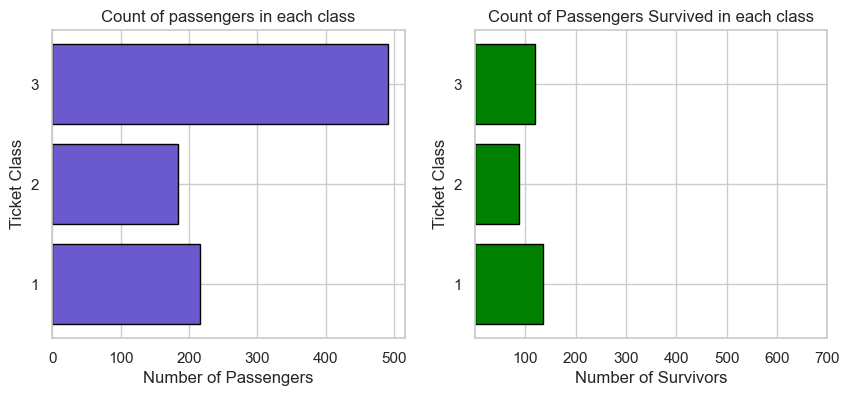

In [124]:
# 3. Visualizing the Survivors from different classes
sns.set_theme(style = 'whitegrid')

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Plotting the count of passengers in each class
pclass_total  = df_train.groupby('Pclass')['Survived'].count()

axes[0].barh(pclass_total.index , pclass_total.values , edgecolor = 'black' , color = 'slateblue')
axes[0].set_title('Count of passengers in each class')
axes[0].set_xlabel('Number of Passengers')
axes[0].set_ylabel('Ticket Class')
axes[0].set_yticks([1 , 2 , 3])

# Plotting the count of passengers survived in each class
pclass_survival  = df_train.groupby('Pclass')['Survived'].sum()

axes[1].barh(pclass_survival.index , pclass_survival.values , edgecolor = 'black' , color = 'green')
axes[1].set_title('Count of Passengers Survived in each class')
axes[1].set_xlabel('Number of Survivors')
axes[1].set_xticks([100 , 200 , 300, 400, 500, 600, 700])
axes[1].set_ylabel('Ticket Class')
axes[1].set_yticks([1 , 2 , 3])

plt.show()


In [125]:
# Calculating the Percentage of Survivors in each class
round(df_train.groupby('Pclass')['Survived'].sum()*100/df_train.groupby('Pclass')['Survived'].count(), 2)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

The data exposes a stark contrast in survival rates among passenger classes aboard the Titanic. First-class passengers experienced significantly higher survival rates compared to those in second and third class. This suggests a potential influence of socioeconomic status on access to lifeboats during the tragic events of the disaster.

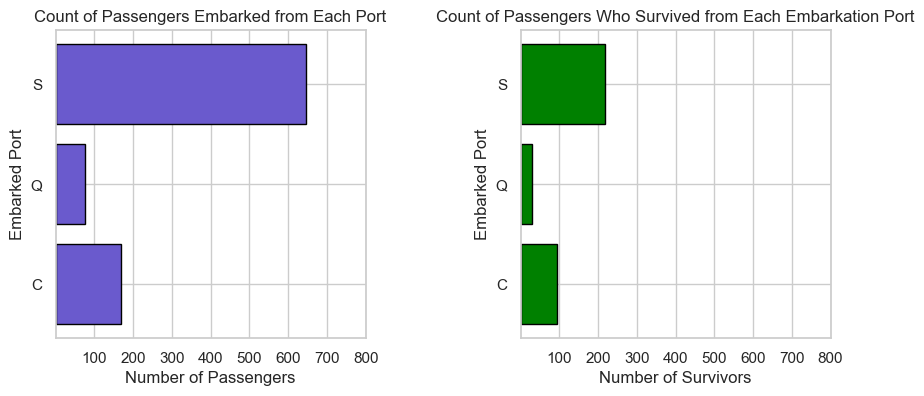

In [126]:
# 4.  Visualizing the Distribution of Survivors by Embarked Port
fig, axes = plt.subplots(1,2,figsize = (10,4))

# Plotting the count of passengers in port
port_total  = df_train.groupby('Embarked')['Survived'].count()

axes[0].barh(port_total.index , port_total.values , edgecolor = 'black' , color = 'slateblue')
axes[0].set_title('Count of Passengers Embarked from Each Port')
axes[0].set_xlabel('Number of Passengers')
axes[0].set_xticks([100 , 200 , 300, 400, 500, 600, 700,800])
axes[0].set_ylabel('Embarked Port')

plt.subplots_adjust(wspace=0.5)
# Plotting the count of passengers survived who embarked from different classes
port_survival  = df_train.groupby('Embarked')['Survived'].sum()

axes[1].barh(port_survival.index , port_survival.values , edgecolor = 'black' , color = 'green')
axes[1].set_title('Count of Passengers Who Survived from Each Embarkation Port')
axes[1].set_xlabel('Number of Survivors')
axes[1].set_xticks([100 , 200 , 300, 400, 500, 600, 700,800])
axes[1].set_ylabel('Embarked Port')

plt.show()

In [127]:
# Calculating the Percentage of Survivors in each class
round(df_train.groupby('Embarked')['Survived'].sum()*100/df_train.groupby('Embarked')['Survived'].count(), 2)

Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64

The embarked port doesn't directly influence the survival rate. However, from the chart, we can see that the highest number of passengers boarded at **Southampton**, where the journey began, while the lowest number boarded at **Queenstown**, the last port.

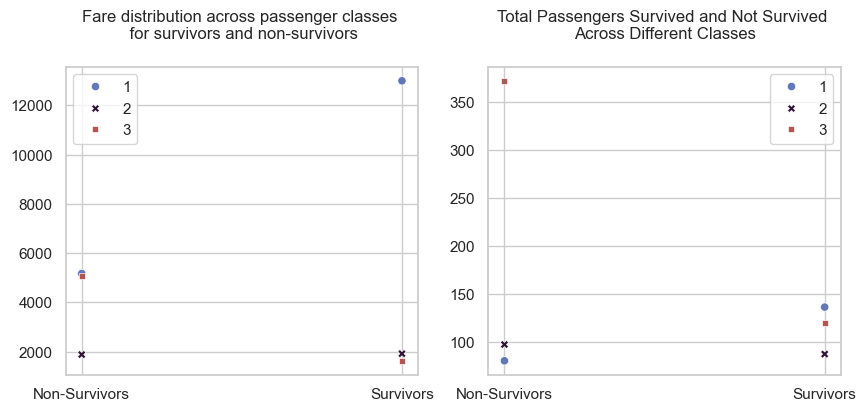

In [128]:
# 5.Visualizing Fare Distribution Among Different Ticket Classes for Survivors and Non-Survivors

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing fare distribution across different classes
sns.scatterplot( pd.pivot_table(df_train,values = 'Fare', index ='Survived', columns = 'Pclass', \
                                aggfunc = 'sum' ).round(2), ax =axes[0], palette = 'twilight')
axes[0].set_title('Fare distribution across passenger classes \n for survivors and non-survivors' , pad = 20)
axes[0].legend(loc = 'upper left')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Non-Survivors','Survivors'])
axes[0].set_xlabel('')


# Visualizing fare distribution across different classes
sns.scatterplot(pd.pivot_table(df_train, index ='Survived', columns = 'Pclass', aggfunc='size'), palette = 'twilight')
axes[1].set_title('Total Passengers Survived and Not Survived \nAcross Different Classes', pad = 20)
axes[1].legend(loc = 'upper right')

axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Non-Survivors','Survivors'])
axes[1].set_xlabel('')
plt.show()

The chart on the left effectively visualizes the survival status of passengers and the distribution of fare across different classes, while the chart on the right displays the number of passengers who survived or not, categorized by their classes.

From the chart, it's evident that survivors in the first class paid higher fares, despite having a survival count similar to the second class.

The third class shows the lowest fare collection among survivors and non-survivors alike, with fewer survivors overall.

## 6. Data Preparation for modeling

In [129]:
# Viewing the data types
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### 6.1 Binary Encoding

In [130]:
# 1. Converting Sex [Binary variable] to 0s and 1s

def gender_code(x):
    if x == 'male':
        return 1
    else:
        return 0

df_train.Sex = df_train.Sex.apply(lambda x: gender_code(x))

# Verify
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [131]:
# Let us encode the Embarked port based on the binary coding

#function to convert to 0s and 1s
def embarked_code(x):
    return x.map({True : 1 , False : 0})
    
# Saving the result in a separate variable
embarked_coded = pd.get_dummies(df_train.Embarked , drop_first = True , prefix = 'Embarked').apply(embarked_code)

# Merging to the actual df
df_train = pd.concat([df_train , embarked_coded] , axis = 1)

# Dropping the original Embarked column
df_train.drop('Embarked' , inplace = True , axis = 1)

# Verify
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [132]:
# Viewing the correlation among variables
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.076970,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.403472,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.124888,-0.114631,-0.245489,-0.182333,-0.074115,0.119224
Age,-0.076970,-0.403472,0.124888,1.000000,-0.276189,-0.192607,0.114160,-0.103278,0.020147
SibSp,-0.035322,0.083081,-0.114631,-0.276189,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.192607,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.114160,0.159651,0.216225,1.000000,-0.117216,-0.162184
Embarked_Q,0.003650,0.221009,-0.074115,-0.103278,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,0.119224,0.020147,0.068734,0.060814,-0.162184,-0.499421,1.000000


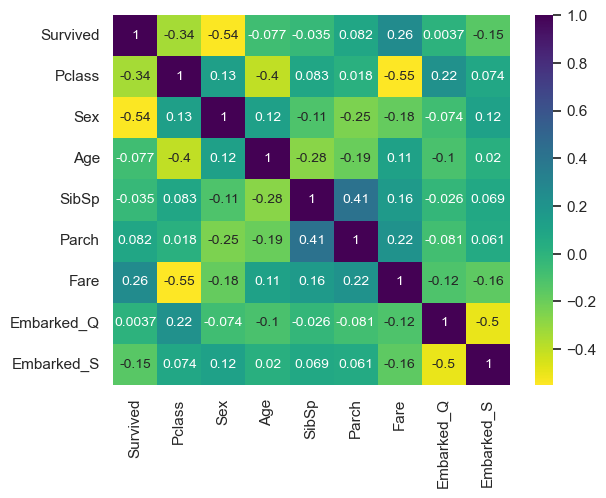

In [133]:
# Visualizing the correlation among variables
sns.heatmap(df_train.corr() , annot = True , cmap = 'viridis_r' , annot_kws={'fontsize': 10})
plt.show()

In the heatmap above, we observe that the target variable "Survived" shows moderate correlations primarily with "Sex" and "Pclass". Apart from these associations, there are no notably strong correlations among the variables. The highest correlation observed is -0.54.

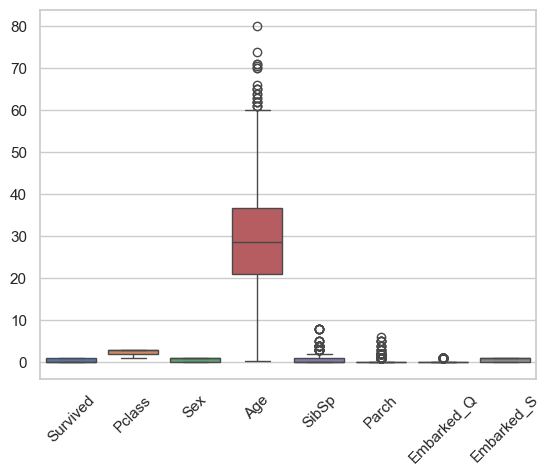

In [134]:
# Viewing all the data on same chart
sns.boxplot(df_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S' ]])
plt.xticks(rotation = 45)
plt.show()

We could notice that the data are distributed across different scales, which could influence the accuracy of our predictions. Therefore, it is essential to scale the data appropriately. Let us split the train and test data before scaling

#### 6.2 Splitting train and test data set

In [135]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

In [136]:
# Splitting the data sets into test and train
df_train , df_test = train_test_split(df_train, train_size = 0.80 , random_state = 100)

# Verify
print('Train shape : ' , df_train.shape)
print('Test shape : ' , df_test.shape)

Train shape :  (712, 9)
Test shape :  (179, 9)


#### 6.3 Resampling Class Imbalance

In [137]:
# Checking the imbalance
df_train[['Survived']].value_counts()

Survived
0           445
1           267
Name: count, dtype: int64

In [138]:
# % of Class Imbalance
round((df_train[['Survived']].sum()*100)/df_train[['Survived']].count()[0] , 2)

Survived    37.5
dtype: float64

From the above, it's evident that only 38% of the Titanic passengers survived, indicating a class imbalance. This must be addressed. Let's use the SMOTE algorithm to tackle this issue.

In [139]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

In [140]:
# Splitting the data set
df_train_X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_Q', 'Embarked_S']]
df_train_y = df_train['Survived']

In [141]:
# Viewing Imbalance before Resampling
counter = Counter(df_train_y)
print( 'Before :' , counter)

Before : Counter({0: 445, 1: 267})


In [142]:
# Oversampling the train dataset using SMOTE
smt = SMOTE()

# Fitting the data
df_train_X_smt ,df_train_y_smt   = smt.fit_resample(df_train_X , df_train_y)

In [143]:
# Viewing Imbalance after Resampling
counter = Counter(df_train_y_smt)
print( 'After :' , counter)

After : Counter({0: 445, 1: 445})


Now that both classes are balanced, let's proceed with scaling.

#### 6.4 Feature Scaling

In [144]:
# Importing necesary library for scaling
from sklearn.preprocessing import StandardScaler

In [145]:
# Grouping all the variables except for the binary ones
scale_var = ['Age','Fare','SibSp', 'Parch', 'Pclass']

In [146]:
# Using the Standardisation method on the variables
scaler = StandardScaler()

df_train_X_smt[scale_var] = scaler.fit_transform(df_train_X_smt[scale_var])

# Verify
df_train_X_smt.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,8.900000e+02,890.000000,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02,890.000000,890.000000
mean,-7.185264e-17,0.552809,4.790176e-17,-1.297339e-17,-4.390994e-17,-5.189357e-17,0.080899,0.680899
std,1.000562e+00,0.497483,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.272833,0.466390
min,-1.400783e+00,0.000000,-2.106638e+00,-4.788261e-01,-4.688773e-01,-6.537323e-01,0.000000,0.000000
25%,-1.400783e+00,0.000000,-6.833036e-01,-4.788261e-01,-4.688773e-01,-5.075043e-01,0.000000,0.000000
50%,-2.356457e-01,1.000000,-4.941816e-02,-4.788261e-01,-4.688773e-01,-3.657006e-01,0.000000,1.000000
75%,9.294914e-01,1.000000,6.251755e-01,4.919148e-01,-4.688773e-01,-2.931176e-02,0.000000,1.000000
max,9.294914e-01,1.000000,3.242134e+00,7.287101e+00,6.240139e+00,8.652707e+00,1.000000,1.000000


## 7. Training the model

Let's create the model using `statsmodels` with all the variables first to examine the statistical summary.

#### 7.1 Model Creation

In [147]:
# Importing necessary Libraries
import statsmodels.api as sm

In [148]:
# Adding constant to the dataset
X_train_sm = sm.add_constant(df_train_X_smt)
y_train = df_train_y_smt

# Verify
X_train_sm.head()

,const,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1.0,0.929491,1,-0.610610,-0.478826,-0.468877,-0.512500,0,1
1,1.0,0.929491,1,-1.482930,4.374878,2.214729,0.198204,0,1
2,1.0,0.929491,1,-0.029064,-0.478826,-0.468877,-0.512954,1,0
3,1.0,-1.400783,0,0.770562,-0.478826,-0.468877,2.133908,0,1
4,1.0,-0.235646,1,0.244990,-0.478826,-0.468877,-0.401921,0,0


In [149]:
# Model Creation 1
lm = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial())

# Viewing Summary
model1 = lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  890
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.86
Date:                Sun, 14 Jul 2024   Deviance:                       723.71
Time:                        22:21:06   Pearson chi2:                     877.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4362
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2387      0.250      8.972      0.000       1.750       2.728
Pclass        -1.1129      0.132     -8.419      0.000      -1.372      -0.854
Sex           -3.0873      0.214    -14.412      0.000      -3.507      -2.667
Age           -0.7555      0.116     -6.535      0.000      -0.982      -0.529
SibSp         -0.3868      0.116     -3.322      0.001      -0.615      -0.159
Parch         -0.1822      0.106     -1.723      0.085      -0.389       0.025
Fare           0.0378      0.133      0.284      0.776      -0.223       0.299
Embarked_Q    -0.6244      0.416     -1.501      0.133      -1.440       0.191
Embarked_S    -0.5549      0.241     -2.302      0.021      -1.027      -0.082
==============================================================================
"""

Embarked_Q and Fare have higher p-values, indicating these variables are insignificant for the model. Next, let's examine the Variance Inflation Factor (VIF).

#### 7.2 VIF

In [150]:
# Importing necesary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
# Viewing the VIF
vif = pd.DataFrame()
vif['Features'] = df_train_X_smt.columns
vif['VIF'] = [variance_inflation_factor(df_train_X_smt.values , i) for i in range(df_train_X_smt.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif  = vif.sort_values( by = 'VIF' , ascending = False)
vif

,Features,VIF
1,Sex,2.12
7,Embarked_S,2.04
0,Pclass,1.81
5,Fare,1.54
2,Age,1.32
4,Parch,1.32
3,SibSp,1.30
6,Embarked_Q,1.12


The VIF values indicate that ther is no multicollinearity among the variables. Let us view the accuracy of the model.

In [152]:
# Accuracy
# Importing  Library
from sklearn import metrics

In [153]:
# predicting the target variable
y_train_pred = model1.predict(X_train_sm)

# Verifying
y_train_pred[:10]

# Setting the threshold
survive = y_train_pred.apply(lambda x : 1 if x >= 0.5 else 0)

# Viewing accuracy
print('1. Model Accuracy: ', round(metrics.accuracy_score(y_train , survive)*100 , 2),'%')

1. Model Accuracy:  81.57 %


With an attained accuracy of 81%, let's proceed by removing the insignificant variables. Fare has the higher insignificance, hence dropping 'Fare'.

In [154]:
# Dropping 'Fare' column
X_train_sm.drop('Fare' , axis = 1, inplace = True)

In [155]:
# Model Creation 2
lm = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial())

# Viewing Summary
model2 = lm.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  890
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.90
Date:                Sun, 14 Jul 2024   Deviance:                       723.80
Time:                        22:21:06   Pearson chi2:                     876.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4362
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2455      0.248      9.040      0.000       1.759       2.732
Pclass        -1.1299      0.118     -9.559      0.000      -1.362      -0.898
Sex           -3.0882      0.214    -14.421      0.000      -3.508      -2.669
Age           -0.7572      0.115     -6.558      0.000      -0.983      -0.531
SibSp         -0.3826      0.116     -3.312      0.001      -0.609      -0.156
Parch         -0.1767      0.104     -1.700      0.089      -0.380       0.027
Embarked_Q    -0.6315      0.415     -1.520      0.129      -1.446       0.183
Embarked_S    -0.5683      0.236     -2.404      0.016      -1.032      -0.105
==============================================================================
"""

The variable 'Embarked_Q' has a p-value of 0.051, which is above the threshold of 0.05, indicating insignificance. Therefore, it needs to be dropped.

In [156]:
# predicting the target variable
y_train_pred = model2.predict(X_train_sm)

# Verifying
y_train_pred[:10]

# Setting the threshold
survive = y_train_pred.apply(lambda x : 1 if x >= 0.5 else 0)

# Viewing accuracy
print('2. Model Accuracy: ', round(metrics.accuracy_score(y_train , survive)*100 , 2),'%')

2. Model Accuracy:  81.57 %


After dropping the variable 'Fare,' the current accuracy is 82.13%. Now, let's proceed with creating the next model after dropping 'Embarked_Q'.

In [157]:
# Dropping 'Embarked_Q' column
X_train_sm.drop('Embarked_Q' , axis = 1, inplace = True)

In [158]:
# Model Creation 3
lm = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial())

# Viewing Summary
model3 = lm.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  890
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -363.06
Date:                Sun, 14 Jul 2024   Deviance:                       726.11
Time:                        22:21:06   Pearson chi2:                     880.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4347
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0553      0.211      9.757      0.000       1.642       2.468
Pclass        -1.1668      0.115    -10.112      0.000      -1.393      -0.941
Sex           -3.0501      0.211    -14.488      0.000      -3.463      -2.637
Age           -0.7507      0.115     -6.541      0.000      -0.976      -0.526
SibSp         -0.3749      0.114     -3.279      0.001      -0.599      -0.151
Parch         -0.1665      0.103     -1.622      0.105      -0.368       0.035
Embarked_S    -0.4039      0.209     -1.933      0.053      -0.813       0.006
==============================================================================
"""

We have one remaining variable with a p-value of 0.079 that should be dropped, which is 'Parch'.

In [159]:
# Predicting the target variable
y_train_pred = model3.predict(X_train_sm)

# Verifying
y_train_pred[:10]

# Setting the threshold
survive = y_train_pred.apply(lambda x : 1 if x >= 0.5 else 0)

# Viewing accuracy
print('3. Model Accuracy: ', round(metrics.accuracy_score(y_train , survive)*100 , 2),'%')

3. Model Accuracy:  81.8 %


The Accuracy has been increased by 0.13% after dropping 'Embarked_Q'

In [160]:
# Dropping 'Parch' column
X_train_sm.drop('Parch' , axis = 1, inplace = True)

In [161]:
# Model Creation 4
lm = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial())

# Viewing Summary
model4 = lm.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  890
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -364.40
Date:                Sun, 14 Jul 2024   Deviance:                       728.80
Time:                        22:21:06   Pearson chi2:                     906.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4330
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0348      0.208      9.801      0.000       1.628       2.442
Pclass        -1.1580      0.115    -10.028      0.000      -1.384      -0.932
Sex           -2.9958      0.206    -14.538      0.000      -3.400      -2.592
Age           -0.7283      0.113     -6.420      0.000      -0.951      -0.506
SibSp         -0.4376      0.109     -4.010      0.000      -0.651      -0.224
Embarked_S    -0.4263      0.207     -2.055      0.040      -0.833      -0.020
==============================================================================
"""

Now that all variables have p-values under 0.05, indicating significance.

In [162]:
# predicting the target variable
y_train_pred = model4.predict(X_train_sm)

# Verifying
y_train_pred[:10]

# Setting the threshold
survive_pred = y_train_pred.apply(lambda x : 1 if x >= 0.5 else 0)

# Viewing accuracy
print('4. Model Accuracy: ', round(metrics.accuracy_score(y_train , survive_pred)*100 , 2),'%')

4. Model Accuracy:  82.02 %


Now that we have finalized Model 4 with 81% accuracy based on p-values, VIF, and overall model performance, let's proceed to analyze precision and recall.

## 8. Precision - Recall Analysis

#### 8.1 Confusion Matrix

In [163]:
# Viewing Confusion matrix
metrics.confusion_matrix(y_train , survive_pred)

array([[369,  76],
       [ 84, 361]], dtype=int64)

In [164]:
#Predicted      Not_Survived  Survived

#Actual
#Not_Survived    461            88
#Survived        108           441

#### 8.2 Precison and Recall

In [165]:
# Viewing the percent score of Precision and Recall
print('Precision :',round(metrics.precision_score(y_train , survive_pred)*100,2) ,'%')
print('Recall    :',round(metrics.recall_score(y_train , survive_pred)*100,2) ,'%')

Precision : 82.61 %
Recall    : 81.12 %


The model achieved higher Precision and Recall scores, indicating that it correctly identifies about 83% of its positive predictions (survivors) and captures approximately 80% of all actual survivors. 

Overall the model is performing well. Let's just have a look at the precision_recall_curve

#### 8.3 Optimal Cut off - Precision_Recall_Curve

In [166]:
# Creating a Dataframe with different thresholds
df_curve = pd.DataFrame()
df_curve['PassengerID']= y_train.index
df_curve['Actual'] = y_train
df_curve['Predicted'] = y_train_pred

threshold =[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



for i in threshold:
    df_curve[i] = df_curve['Predicted'].apply(lambda x: 0 if x< i else 1)

# Verify
df_curve.tail()

,PassengerID,Actual,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
885,885,1,0.863816,1,1,1,1,1,1,1,1,0
886,886,1,0.628316,1,1,1,1,1,1,0,0,0
887,887,1,0.813311,1,1,1,1,1,1,1,1,0
888,888,1,0.966713,1,1,1,1,1,1,1,1,1
889,889,1,0.949471,1,1,1,1,1,1,1,1,1


In [167]:
# Crating a table with different Thresholds and their metrics
prcurve = pd.DataFrame(columns =['Threshold','Accuracy','Precision' , 'Recall' ])

for i in threshold:
    cm = metrics.confusion_matrix(df_curve['Actual'] , df_curve[i])
    total = sum(sum(cm))
    accuracy = (cm[1,1]+cm[0,0])/total

    recall = cm[1,1]/(cm[1,1]+cm[1,0])
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    prcurve.loc[i] = [i, accuracy , recall, precision]

print(prcurve)

     Threshold  Accuracy  Precision    Recall
0.1        0.1  0.629213   0.964045  0.577389
0.2        0.2  0.762921   0.921348  0.699659
0.3        0.3  0.785393   0.885393  0.737828
0.4        0.4  0.806742   0.853933  0.780287
0.5        0.5  0.820225   0.811236  0.826087
0.6        0.6  0.814607   0.752809  0.858974
0.7        0.7  0.808989   0.694382  0.900875
0.8        0.8  0.796629   0.631461  0.942953
0.9        0.9  0.682022   0.373034  0.976471


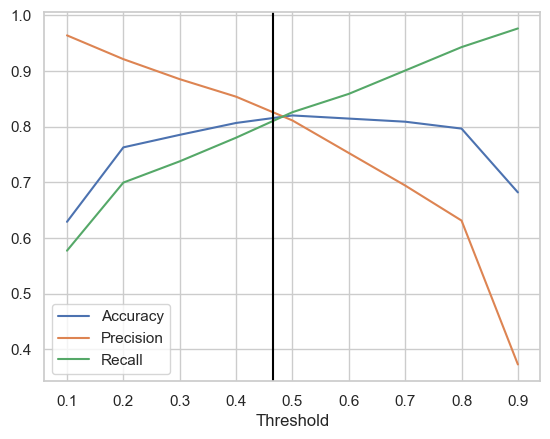

In [168]:
# Plotting different Thresholds and their metrics
prcurve.plot.line(x= 'Threshold' , y = ['Accuracy','Precision' , 'Recall' ])
plt.axvline(x=0.465, color='black')  
plt.show()

From the above results, we identified the optimal threshold as 0.465, where the accuracy, precision, and recall are all above 80%. Therefore, we are finalizing the threshold at 0.465.

In [169]:
# Finding the predictions for threshold  0.45
y_train_pred_final = y_train_pred.apply(lambda x: 1 if x>0.465 else 0)

In [170]:
print('Accuracy: ', round(metrics.accuracy_score(y_train , y_train_pred_final)*100 , 2),'%')
print('Precision :',round(metrics.precision_score(y_train , y_train_pred_final)*100,2) ,'%')
print('Recall    :',round(metrics.recall_score(y_train , y_train_pred_final)*100,2) ,'%')

Accuracy:  81.35 %
Precision : 81.21 %
Recall    : 81.57 %


Based on our findings, we have achieved optimal metrics—accuracy, precision, and recall—by using the identified optimal threshold, which gives more than 80% of all three metrics.

## 9. Predicting on the test data

In [171]:
# Splitting X and y variables
df_test_X = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_Q', 'Embarked_S']]
df_test_y = df_test['Survived']

# Scaling test data
df_test_X[scale_var] = scaler.transform(df_test_X[scale_var])

#Dropping columns that are not in training data
df_test_X.drop(['Parch', 'Fare','Embarked_Q'] , inplace = True , axis = 1)

# Adding constant 
df_test_X_sm = sm.add_constant(df_test_X)

# Predicting on the test set
test_predict = model4.predict(df_test_X_sm)

# Finding the predictions
y_test_pred_final = test_predict.apply(lambda x: 1 if x>0.465 else 0)

In [172]:
# Creating table for easy calculation of metrics
cmtable = pd.DataFrame()
cmtable['Passenger ID'] = df_test_X.index + 1
cmtable['Actual']  = df_test_y.values
cmtable['Pred_prob'] = test_predict.values
cmtable['Prediction'] = y_test_pred_final.values
cmtable.head()

,Passenger ID,Actual,Pred_prob,Prediction
0,206,0,0.899553,1
1,45,1,0.847937,1
2,822,1,0.106490,0
3,459,1,0.731112,1
4,796,0,0.195733,0


In [173]:
# Calculating metrics
print('Accuracy: ', round(metrics.accuracy_score(cmtable['Actual'] , cmtable['Prediction'])*100 , 2),'%')
print('Precision :',round(metrics.precision_score(cmtable['Actual'] , cmtable['Prediction'])*100,2) ,'%')
print('Recall    :',round(metrics.recall_score(cmtable['Actual'] , cmtable['Prediction'])*100,2) ,'%')

Accuracy:  82.12 %
Precision : 78.67 %
Recall    : 78.67 %


While comparing the metrics between the train and test set, We could infer, Although the accuracy remains consistent between the training and test datasets, there is a noticeable decrease in precision and recall by 3% and 4%, respectively. Nonetheless, the model continues to perform adequately well.

## 10.  Preparing for Submission

In [174]:
# Viewing the data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 10.1 Missing values

We should apply the same treatment to the test set as we did to the training set.

In [175]:
# Viewing the missing values
test.isnull().sum()[test.isnull().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

#### 10.1.1 Handling missing values - Imputing

In [176]:
# Creating a new column to help us to impute the 
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.' , expand = False)

# Viewing the missing age for each title
test.Title[test.Age.isna()].value_counts()

Title
Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: count, dtype: int64

In [177]:
# 1. Combining Miss and Ms into a single category: Miss.
test.Title[(test.Age.isna()) & (test.Title == 'Ms')] = 'Miss'

# Viewing the missing values of Masters
test[(test.Age.isna()) & (test.Title == 'Master')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Master
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,Master
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,Master
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [178]:
# 2. Imputing the Age of Master travelling alone as 14(highest age to be categorized as Master)
test.Age[(test.Title == 'Master') & (test.Parch == 0)] = 14

# 3. Imputing Age for other Masters traveling in P3 with 5, which is the mean age of Masters in P3
test.Age[(test.Title == 'Master') & (test.Age.isna())] = 5

Imputing the Age for the test set using the function we created earlier for the training set.

In [179]:
# 4. Calling function to impute the missing values
test = impute(test)

# Verify
test.isnull().sum()[test.isnull().sum()>0]

Fare       1
Cabin    327
dtype: int64

In [180]:
# 5. Imputing Fare with dummy value
# Fare column will be dropped in future, but we need it since we have to perform the transform scaling, hence imputing the Fare with 0 as dummy value
test.Fare[(test.Fare.isna())] = 0

# Verify
test.isnull().sum()[test.isnull().sum()>0]

Cabin    327
dtype: int64

We can safely disregard the 'Cabin' column as it will be dropped later. Currently, all missing values have been successfully handled.

#### 10.2 Binary Encoding   

In [181]:
# 1. Let us encode the Embarked port based on the binary coding
# Embarked code - Function to convert to 0s and 1s - reused
    
# Saving the embarked coded in a separate variable as a DF
embarked_coded = pd.get_dummies(test.Embarked , drop_first = True , prefix = 'Embarked').apply(embarked_code)

# Merging to the actual df
test = pd.concat([test , embarked_coded] , axis = 1)

# Dropping the original Embarked column
test.drop('Embarked' , inplace = True , axis = 1)

# Verify
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Mr,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Mrs,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Mr,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Mr,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Mrs,0,1


In [182]:
# 2. Converting Sex [Binary variable] to 0s and 1s
# Reusing gender_code function 
test.Sex = test.Sex.apply(lambda x: gender_code(x))

# Verify
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Mr,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,Mrs,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Mr,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,Mr,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,Mrs,0,1


#### 10.3 Scaling the Features

In [183]:
# Scaling the features
test[scale_var] = scaler.transform(test[scale_var])

# Verify
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.073757,0.636364,0.015354,-0.044547,0.057572,-0.008114,0.110048,0.645933
std,120.810458,0.980856,0.481622,0.954831,0.870521,1.316884,1.014834,0.313324,0.478803
min,892.000000,-1.400783,0.000000,-2.124811,-0.478826,-0.468877,-0.653732,0.000000,0.000000
25%,996.250000,-1.400783,0.000000,-0.592437,-0.478826,-0.468877,-0.510305,0.000000,0.000000
50%,1100.500000,0.929491,1.000000,-0.159912,-0.478826,-0.468877,-0.391172,0.000000,1.000000
75%,1204.750000,0.929491,1.000000,0.507049,0.491915,-0.468877,-0.082047,0.000000,1.000000
max,1309.000000,0.929491,1.000000,3.387520,7.287101,11.607352,8.652707,1.000000,1.000000


#### 10.4 Dropping the unnecessary columns

In [184]:
# Creating a new data set with the columns for machine learning model
test_X = test[['Pclass' , 'Sex' , 'Age' , 'SibSp'  , 'Embarked_S']]

# Verify
test_X.head()

,Pclass,Sex,Age,SibSp,Embarked_S
0,0.929491,1,0.370749,-0.478826,0
1,0.929491,0,1.279415,0.491915,1
2,-0.235646,1,2.369814,-0.478826,0
3,0.929491,1,-0.174451,-0.478826,1
4,0.929491,0,-0.537917,0.491915,1


#### 10.5 Prediction and Submission


In [185]:
#  Adding constant
test_sm = sm.add_constant(test_X)

# Predicting
predicted_prob = model4.predict(test_sm)

# Converting the prediction values based on the finalised threshold
Survival_predicted = predicted_prob.apply(lambda x: 1 if x>0.465 else 0)

In [186]:
# Adding predicted values to the original data frame
test['predicted_probab'] = predicted_prob.values

# Adding predicted values to the original data frame
test['Survived'] = Survival_predicted.values

In [187]:
# Creating the Submission file
submission = pd.DataFrame(test[['PassengerId' , 'Survived']])

In [189]:
# Exporting
submission.to_csv('submission.csv' , index=False)

I have submitted the above file to Kaggle Titanic set competion and got a public score of 0.74